<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-geomechanics/blob/master/homework%205/homework5_reservoir_geomechanics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 5**

Python 2 runtime

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Note: `mplstereonet` in Colab works with Python 2 runtime

In [2]:
!pip install mplstereonet

     |████████████████████████████████| 1.1MB 1.4MB/s 
  Created wheel for mplstereonet: filename=mplstereonet-0.5-cp27-none-any.whl size=25872 sha256=b1d4f6e3e212ff1a377f6c0d56d1aef82266451a3f841b8c33eeca9727ecd7f2
  Stored in directory: /root/.cache/pip/wheels/bb/72/2a/fe407620c3df459ab82f4cf9891442932e1bac653d05a267af
Successfully built mplstereonet


In [3]:
!git clone https://github.com/yohanesnuwara/reservoir-geomechanics

Cloning into 'reservoir-geomechanics'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 188 (delta 20), reused 0 (delta 0), pack-reused 135
Receiving objects: 100% (188/188), 11.03 MiB | 6.59 MiB/s, done.
Resolving deltas: 100% (76/76), done.


In [4]:
barnett = pd.read_csv('/content/reservoir-geomechanics/homework 5/Barnett_fractures.csv')
barnett.head(10)

,depth,strike,dip,dip_direction,aperture
0,5200.824,228.25,76.41,318.25,4.31
1,5200.965,207.80,86.11,297.80,5.87
2,5205.068,233.97,84.07,323.97,7.22
3,5208.820,206.68,82.67,296.68,5.52
4,5221.970,214.65,77.20,304.65,5.44
5,5232.421,211.99,79.37,301.99,9.95
6,5248.538,214.61,79.88,304.61,12.24
7,5252.678,226.41,84.78,316.41,10.21
8,5269.203,245.50,80.63,335.50,8.22
9,5280.625,238.08,81.70,328.08,2.67


Plot dip data and strike data.

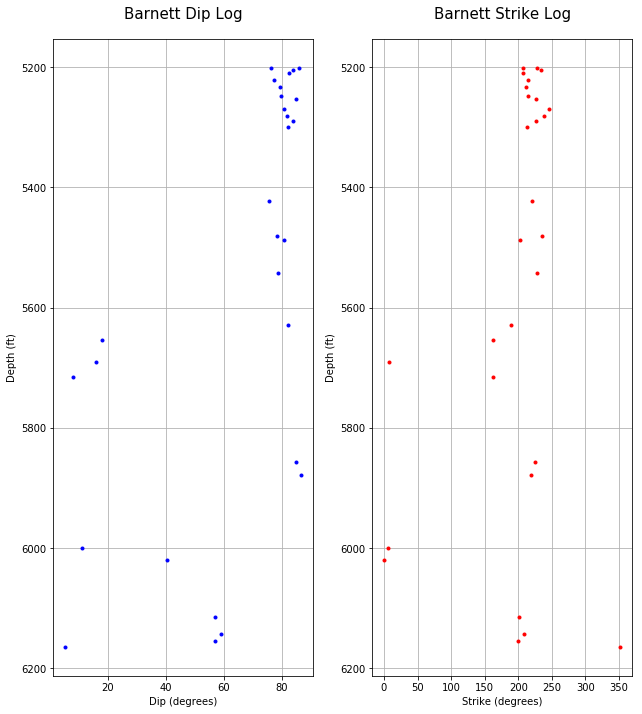

In [5]:
plt.figure(figsize=(9,10))
plt.subplot(1,2,1)
plt.plot(barnett.dip, barnett.depth, '.', color='blue')
plt.title("Barnett Dip Log", pad=20, size=15)
plt.xlabel("Dip (degrees)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.plot(barnett.strike, barnett.depth, '.', color='red')
plt.title("Barnett Strike Log", pad=20, size=15)
plt.xlabel("Strike (degrees)"); plt.ylabel("Depth (ft)")
plt.grid(True)
plt.gca().invert_yaxis()

plt.tight_layout(pad=1.0) # set distance between two plots

## Question: Which of the following depth intervals contains the highest number of fractures?

Depth histogram

Answer: $< 5400 ft$

(array([11.,  1.,  3.,  1.,  2.,  2.,  1.,  1.,  2.,  4.]),
 array([5200.824 , 5297.1613, 5393.4986, 5489.8359, 5586.1732, 5682.5105,
        5778.8478, 5875.1851, 5971.5224, 6067.8597, 6164.197 ]),
 <a list of 10 Patch objects>)

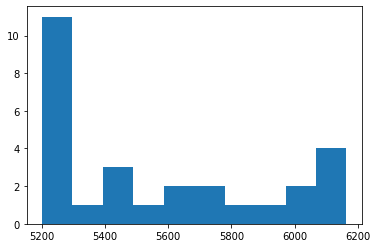

In [0]:
plt.hist(barnett.depth, bins=10)

## Question: Which of the following strike contains the highest number of fractures?

Strike histogram

Answer: $180^o < strike < 270^o$

Text(0, 0.5, 'Fracture count')

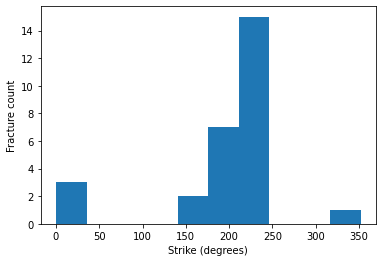

In [0]:
plt.hist(barnett.strike)
plt.xlabel('Strike (degrees)'); plt.ylabel('Fracture count')

## Question: Which of the following dip contains the highest number of fractures?

Dip histogram

Answer: $75^o < dip < 90^o$

Text(0, 0.5, 'Fracture count')

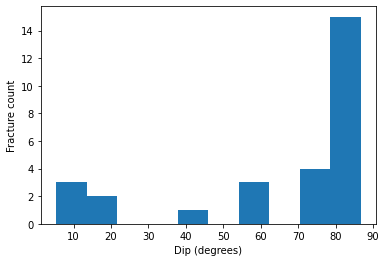

In [0]:
plt.hist(barnett.dip, bins=10)
plt.xlabel('Dip (degrees)'); plt.ylabel('Fracture count')

## Question: Which of the following dip directions contains the highest number of fractures?

Dip direction histogram

Answer: $270^o < dip direction < 360^o$

Text(0, 0.5, 'Fracture count')

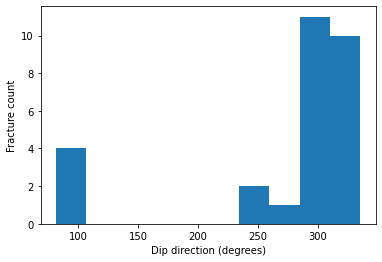

In [0]:
plt.hist(barnett.dip_direction, bins=10)
plt.xlabel('Dip direction (degrees)'); plt.ylabel('Fracture count')

## Question: Which of the following aperture contains the highest number of fractures?

Aperture histogram

Answer: $< 4 mm$

Text(0, 0.5, 'Fracture count')

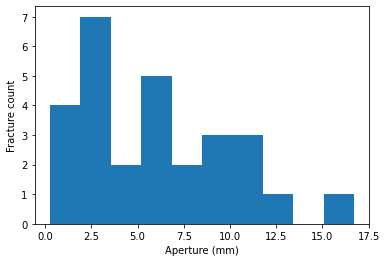

In [0]:
plt.hist(barnett.aperture, bins=10)
plt.xlabel('Aperture (mm)'); plt.ylabel('Fracture count')

## Question: Which of the following aperture intervals contains the highest number of gently dipping fractures of which the dip is less than 45°?

Scatter plot dip vs aperture

Answer: $> 8 mm$

Text(0, 0.5, 'Dip')

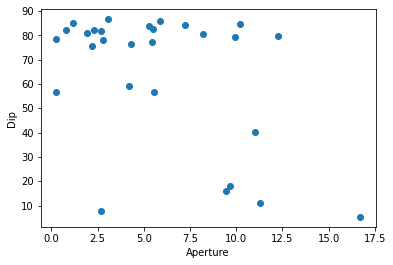

In [0]:
plt.scatter(barnett.aperture, barnett.dip)
plt.xlabel('Aperture'); plt.ylabel('Dip')

## Question: Which of the following aperture intervals contains the highest number of nearly north-south striking fractures of which the strike is either between 0° and 15°, or between 75° and 105°, or between 345° and 360°?

Scatter plot strike vs aperture

Answer: $> 8 mm$

Text(0, 0.5, 'Strike')

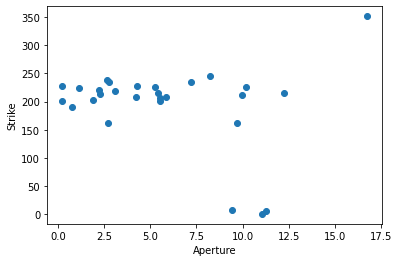

In [0]:
plt.scatter(barnett.aperture, barnett.strike)
plt.xlabel('Aperture'); plt.ylabel('Strike')

Dip vs dip direction with aperture as the color

Comment: Large fracture appertures dominate at shallow dip angles, small apertures dominate at high dip angles. 

Text(0, 0.5, 'Dip ($^o$)')

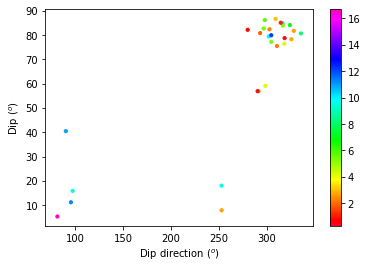

In [0]:
def xplot(axisx, axisy, axisz):
  plt.scatter(axisx, axisy, c=axisz, s=10, cmap='gist_rainbow')
  plt.colorbar()

axisx = barnett.dip_direction
axisy = barnett.dip
axisz = barnett.aperture

xplot(axisx, axisy, axisz)
plt.xlabel('Dip direction ($^o$)'); plt.ylabel('Dip ($^o$)')

# Stereonet

Stereonet and pole diagram

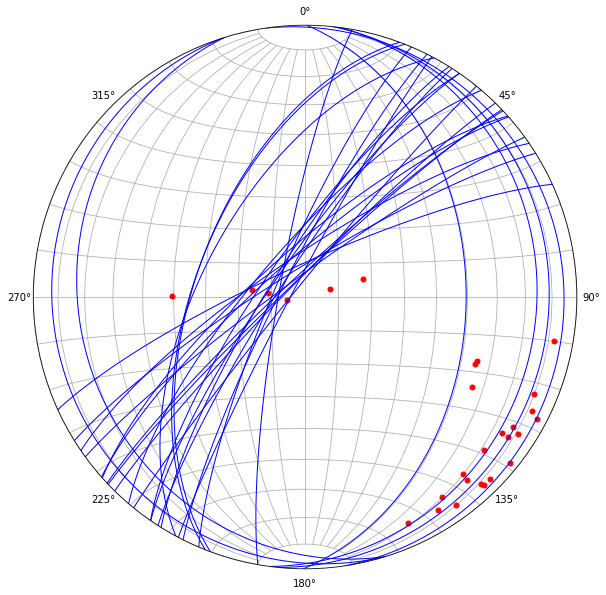

In [22]:
import mplstereonet

strikes = np.array(barnett.strike)
dips = np.array(barnett.dip)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='stereonet')
ax.pole(strikes, dips, 'r.', markersize=10)
ax.plane(strikes, dips, 'b-', linewidth=1)
ax.grid()

Rose and contour diagram

In [0]:
# calculate the number of strikes every 10 degree
bin_edges = np.arange(-5, 366, 10)
number_of_strikes, bin_edges = np.histogram(strikes, bin_edges)

# Sum the last value with the first value
number_of_strikes[0] += number_of_strikes[-1]

# Sum the first half 0-180° with the second half 180-360° to achieve the "mirrored behavior" of Rose Diagrams
half = np.sum(np.split(number_of_strikes[:-1], 2), 0)
two_halves = np.concatenate([half, half])

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


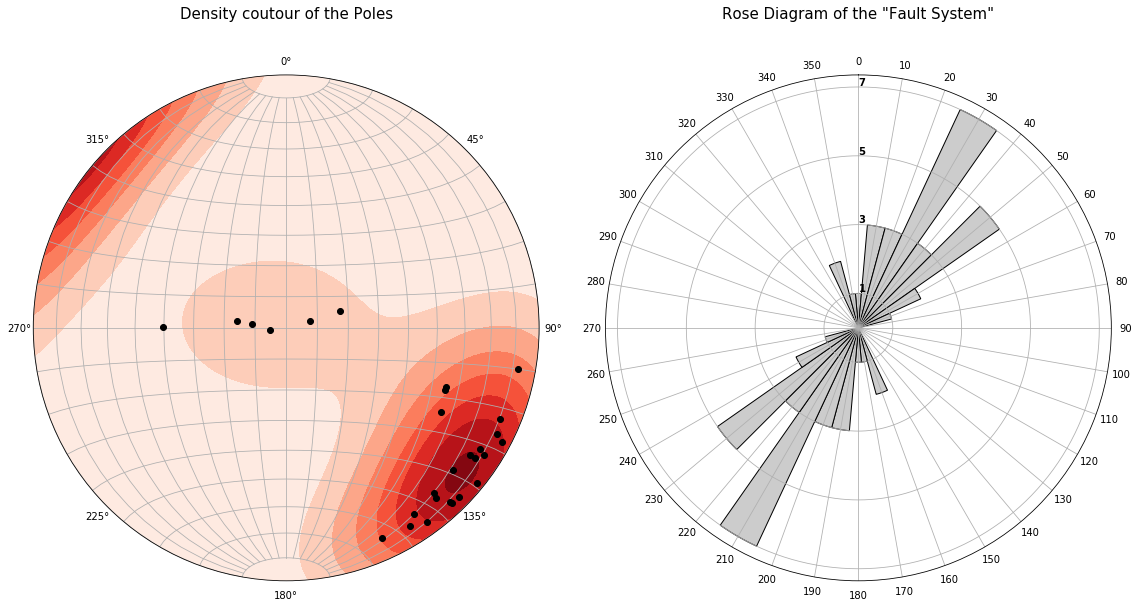

In [26]:
# create the rose diagram
fig = plt.figure(figsize=(16,8))

ax = fig.add_subplot(121, projection='stereonet')

ax.pole(strikes, dips, c='k', label='Pole of the Planes')
ax.density_contourf(strikes, dips, measurement='poles', cmap='Reds')
ax.set_title('Density coutour of the Poles', y=1.10, fontsize=15)
ax.grid()

ax = fig.add_subplot(122, projection='polar')

ax.bar(np.deg2rad(np.arange(0, 360, 10)), two_halves, 
       width=np.deg2rad(10), bottom=0.0, color='.8', edgecolor='k')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.arange(0, 360, 10), labels=np.arange(0, 360, 10))
ax.set_rgrids(np.arange(1, two_halves.max() + 1, 2), angle=0, weight= 'black')
ax.set_title('Rose Diagram of the "Fault System"', y=1.10, fontsize=15)

fig.tight_layout()